In [58]:
import numpy as np
import pandas as pd

import os
from sklearn.neighbors import KNeighborsClassifier

from sklearn import tree

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import RidgeClassifier

from sklearn.model_selection import train_test_split

from sklearn import metrics

In [71]:
df = pd.read_csv("data.csv") #change the name accordingly
df = df.drop_duplicates()
df.head()

,Temp,Humd,Label
0,31.0,52.0,1
1,317.0,809.0,0
2,29.0,72.0,1
3,318.0,899.0,0
4,32.0,79.0,1


In [72]:
missing_values = df.isnull().sum()

x = df.drop(['Label'],axis=1)
y = df['Label']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=1)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) #scale training set
x_test = scaler.transform(x_test) #scale test set


# clf = RidgeClassifier(solver="svd", random_state=1)
# RC = clf.fit(x_train, y_train)

# predict = RC.predict(x_test)


# clf = KNeighborsClassifier(n_neighbors=3, weights="distance")
# KNN = clf.fit(x_train,y_train)

# predict = KNN.predict(x_test)

clf = tree.DecisionTreeClassifier(max_features=0.5)
TREE = clf.fit(x_train, y_train)

predict = TREE.predict(x_test)

In [73]:
print("\n\
      train set: {}\
      test set: {}\
      sum: {}".format(len(x_train), len(x_test), (len(x_test)+len(x_train))))


      train set: 168      test set: 43      sum: 211


In [74]:
print("Accuracy:", metrics.accuracy_score(y_test,predict))

Accuracy: 1.0


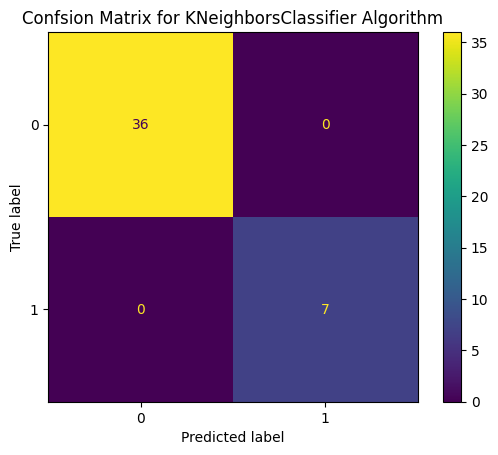

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predict, labels=[True, False])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

# plt.title("Confsion Matrix for RidgeClassifier Algorithm")
# plt.title("Confsion Matrix for KNeighborsClassifier Algorithm")
# plt.title("Confsion Matrix for DecisionTreeClassifier Algorithm")
plt.show()

In [75]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision_score(y_test, predict)*100
recall_score(y_test, predict)*100
f1_score(y_test, predict)*100

print("\n\
      train set: {}\
      test set: {}\
      sum: {}".format(precision_score(y_test, predict)*100, recall_score(y_test, predict)*100, f1_score(y_test, predict)*100))



      train set: 100.0      test set: 100.0      sum: 100.0


In [76]:
import pickle

filename = "Group_3_model_TREE.pickle"

pickle.dump(clf, open(filename, "wb"))